**[Click Here For Reports](https://docs.google.com/document/d/19kRYnLMNaJd2-VxEOvKyjml9Ah9NJOOXAWDGtYYSzJI/edit?usp=sharing)**

## Code implementation

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.decomposition import PCA

In [ ]:
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn.*')
warnings.filterwarnings("ignore", category=UserWarning, module='pandas.*')

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/rafiag/DTI2020/main/data/bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [ ]:
# Standardize the numerical variables
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

In [ ]:
# Find the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

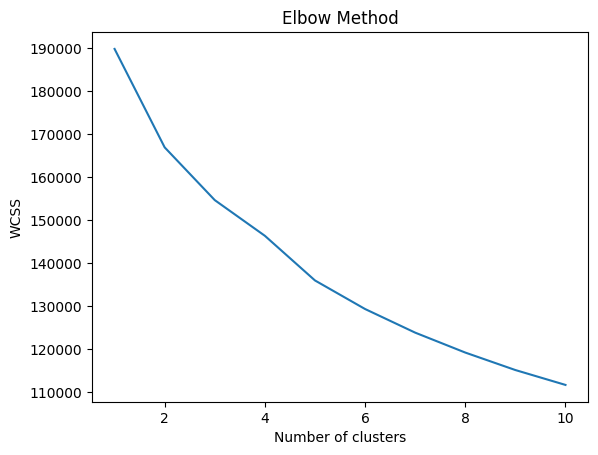

In [ ]:
# Plot the elbow method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Elbow-Method Report
To determine the optimal number of clusters for the K-means algorithm, the Elbow method was used. This method helps us find the point where adding more clusters does not significantly improve the reduction of the sum of squared errors (WCSS).
The resulting plot shows that after 4 clusters, the rate of WCSS reduction decreases and becomes relatively flat. This indicates that the optimal number of clusters for this dataset is 4. Therefore, based on this analysis, the number of clusters was set to 4 and the K-means algorithm was executed.

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(data_scaled)
df['Cluster'] = kmeans.labels_

### K-means Evaluation
The quality of the clustering was evaluated using three different metrics. The silhouette score for the clustering was 0.1, indicating that the clusters are moderately well-separated, but there is still room for improvement. A higher silhouette score, closer to 1, indicates better separation between clusters.

In [ ]:
# Evaluate the clustering

silhouette_avg = silhouette_score(data_scaled, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg}')

davies_bouldin = davies_bouldin_score(data_scaled, kmeans.labels_)
print(f'Davies-Bouldin Index: {davies_bouldin}')

calinski_harabasz = calinski_harabasz_score(data_scaled, kmeans.labels_)
print(f'Calinski-Harabasz Index: {calinski_harabasz}')

Silhouette Score: 0.10500809647503079
Davies-Bouldin Index: 2.535904003473105
Calinski-Harabasz Index: 1103.0789246181637


In [ ]:
# Apply PCA for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

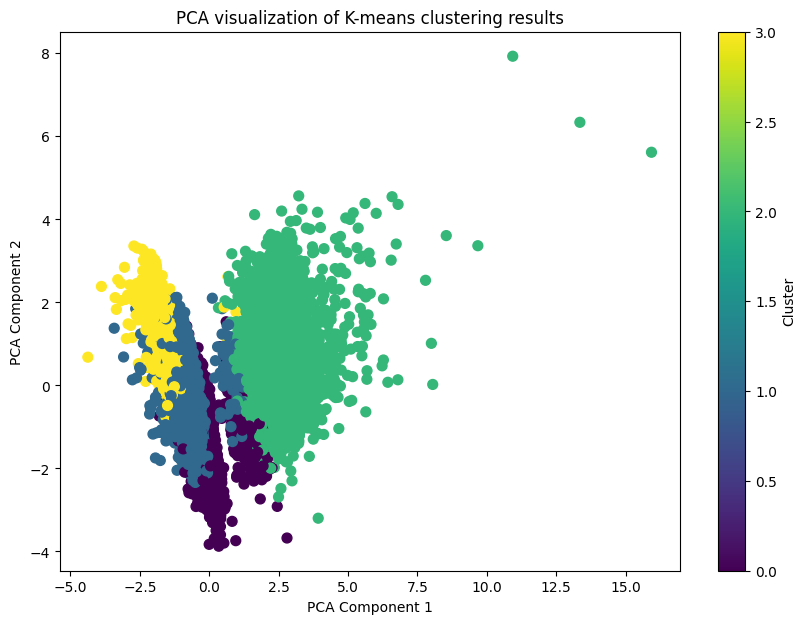

In [ ]:
# Visualize the clustering results using PCA components
plt.figure(figsize=(10, 7))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=df['Cluster'], cmap='viridis', s=50)
plt.title('PCA visualization of K-means clustering results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()